# Outliers

Outliers are unusual values in your dataset, and they can distort statistical analyses and violate their assumptions. Unfortunately, all analysts will confront outliers and be forced to make decisions about what to do with them. Given the problems they can cause, you might think that it’s best to remove them from your data. But, that’s not always the case. Removing outliers is legitimate only for specific reasons.

**Outliers can be very informative about the subject-area and data collection process. It’s essential to understand how outliers occur and whether they might happen again as a normal part of the process or study area.** Unfortunately, resisting the temptation to remove outliers inappropriately can be difficult. Outliers increase the variability in your data, which decreases statistical power. Consequently, excluding outliers can cause your results to become statistically significant.

## Methods of Detecting and Removing Outliers
1. **Graphing Your Data to Identify Outliers** (Univariate and Multivariate graphical analysis i.e Box Plot, Histogram, Scatterplot etc.)
2. **Interquartile Method**
3. **Z-scores to Detect Outliers**
4. **Modified Z-Score**
4. **Finding Outliers with Hypothesis Tests**
5. **KNN**
6. **Local Outlier Factor**
7. **Isolation Forest**
8. **KMeans**
1. **DBSCAN**
2. **Bayesian Networks**
3. **Neural networks**
4. **LSTM networks**
5. **Hidden Markov models**
6. **Support vector machines**
7. **Fuzzy logic based outlier detection**
8. **Elliptic Envelope**
9. **Time series anomaly detection**


### 1. Graphing Your Data to Identify Outliers



In [113]:
import sklearn
from sklearn.datasets import load_diabetes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [114]:
# Load the dataset
diabetics = load_diabetes()
 
# Create the dataframe
column_name = diabetics.feature_names
df_diabetics = pd.DataFrame(diabetics.data)
df_diabetics.columns = column_name
df_diabetics.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


<AxesSubplot: >

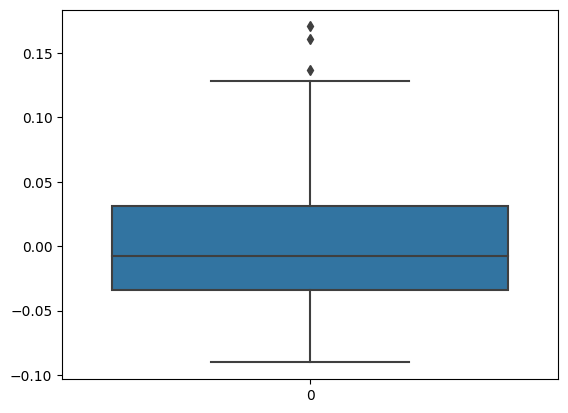

In [115]:
sns.boxplot(df_diabetics['bmi'])

In [116]:
''' Detection '''
# IQR
# Calculate the upper and lower limits
print("Old Shape: ", df_diabetics.shape)
Q1 = df_diabetics['bmi'].quantile(0.25)
Q3 = df_diabetics['bmi'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
# Create arrays of Boolean values indicating the outlier rows

upper_array = np.where(df_diabetics['bmi']>=upper)[0]
lower_array = np.where(df_diabetics['bmi']<=lower)[0]

# Removing the outliers
if(len(upper_array)!=0):
    df_diabetics.drop(index=upper_array, inplace=True)
    df_diabetics.reset_index(drop=True,inplace=True)
if(len(lower_array)!=0):
    df_diabetics.drop(index=lower_array, inplace=True)
    df_diabetics.reset_index(drop=True,inplace=True)

# Print the new shape of the DataFrame
print("New Shape: ", df_diabetics.shape)

Old Shape:  (442, 10)
-0.13244469328909578 0.1294636406639386
New Shape:  (439, 10)


<AxesSubplot: >

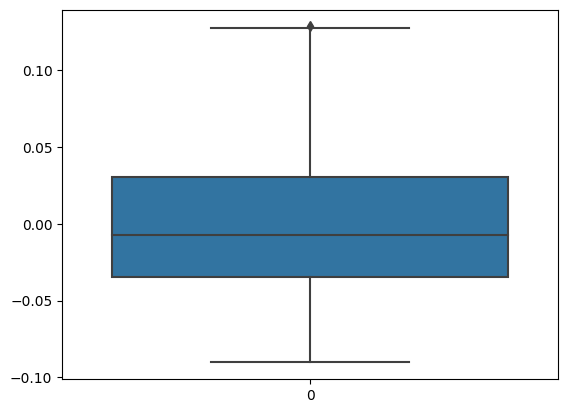

In [117]:
sns.boxplot(df_diabetics['bmi'])

In [118]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import zscore
from sklearn.datasets import fetch_california_housing

cali_houses = fetch_california_housing()

X = cali_houses.data
column_names = cali_houses.feature_names
y = cali_houses.target

df = pd.DataFrame(data=X, columns=column_names)

display(df)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


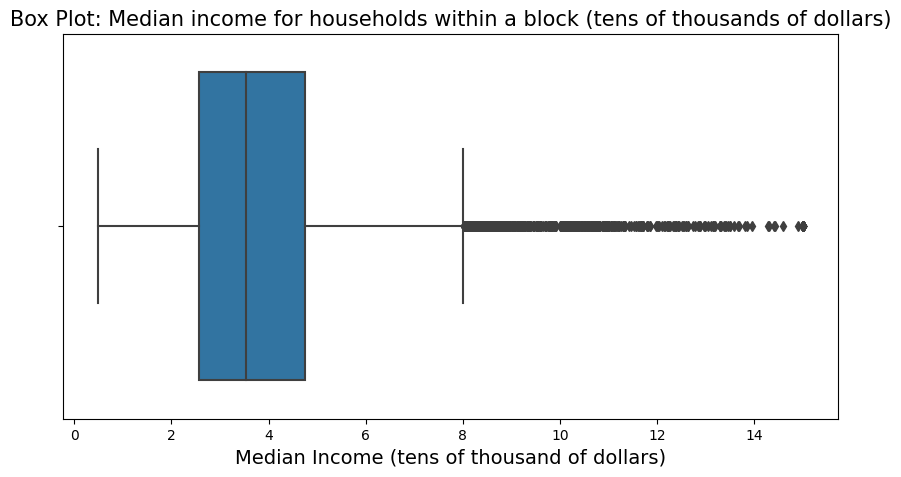

In [121]:

fig = plt.figure(figsize=(10,5))
sns.boxplot(x=df.MedInc)
plt.title('Box Plot: Median income for households within a block (tens of thousands of dollars)', fontsize=15)
plt.xlabel('Median Income (tens of thousand of dollars)', fontsize=14)
plt.show()